# 数据背景：
<img src='Titanic.jpg' width=500>
* 1912年，当时世界上体积最庞大、内部设施最豪华的客运轮船，有“永不沉没”美誉的泰坦尼克号，在她的处女航中撞冰山沉入大西洋底3700米处，船上1500多人丧生。
* 1985年，美国和法国联合搜索队发现泰坦尼克号残骸。
<img src='titanic_movice.jpg' width=500>
<img src='titanic_movice1.jpg' width=500>
* 1997年，詹姆斯•卡梅隆执导美国电影《泰坦尼克号》，将整个惊心动魄的过程首次以电影的方式还原。
* 2012年，《泰坦尼克号》3D版在中国内地重映，再次唤起人们对艘富有传奇色彩的巨轮的缅怀。
* 2017年5月，有科学家表示，细菌正在蚕食泰坦尼克号沉船残骸。据最近的估计，到2030年，这艘船可能会迎来它的末日，彻底消失。

发生在1912年的泰坦尼克事件，导致船上2224名游客阵亡1502（我们的男主角也牺牲了），作为事后诸葛亮，我们掌握船上乘客的一些数据以及一部分乘客是否获救的信息。假设如果真有穿越这回事，突然哪一天你的灵魂穿越到了正在航行的泰坦尼克号上的某个乘客身上，你发现你身处某层客舱内，被你的同伴称为Mr/Miss，而你只有现代的记忆。突然一声巨响同时船身剧烈摇晃，人们惊慌不知所措，那么此时此刻的你，有多大机率可以活下来？

# 数据来源

著名的数据分析竞赛网站Kaggle上，举行了很多数据分析比赛，其中比较著名的就有 泰坦尼克号乘客生还预测 。Kaggle提供的数据集中，共有1309名乘客数据，其中891是已知存活情况，剩下418则是需要进行分析预测的。提供的数据特征如下：
<pre>
    PassengerId: 乘客编号
    Survived   :存活情况（存活：1 ; 死亡：0）
    Pclass     : 客舱等级
    Name       : 乘客姓名
    Sex        : 性别
    Age        : 年龄
    SibSp      : 同乘的兄弟姐妹/配偶数
    Parch      : 同乘的父母/小孩数
    Ticket     : 船票编号
    Fare       : 船票价格
    Cabin      :客舱号
    Embarked   : 登船港口
</pre>


# 数据分析
说到数据挖掘，是把散乱数据转换成「有价值」信息的过程，数据是可以是数字或者文本内容甚至图像，而信息是有语义的、人脑可理解的报告、图表。
数据分析的结果，就是把数字转化成人类可理解的信息。


In [21]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
import sklearn.naive_bayes as nb 
from sklearn.learning_curve import learning_curve
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='C:\Windows\Fonts\simsun.ttc',size=10)
import seaborn as sns
%matplotlib inline

# 读入数据
data_train = pd.read_csv("Train.csv")
# 切分数据集为训练集和测试集
X = data_train[['Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin', 'Embarked']]
y = data_train['Survived']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# 数据概览
先看一眼已有的数据概括。

In [2]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data_train.info()
#我们发现有一些列，比如说Cabin，有非常多的缺失值
#另外一些我们感觉在此场景中会有影响的属性，比如Age，也有一些缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Text(0.5,1,'训练集特征的协方差')

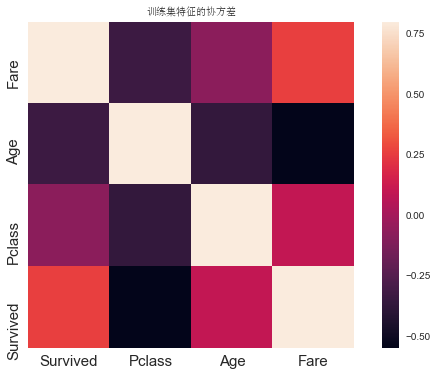

In [5]:
sns.set(context="paper", font="simsun")
sns.set(style="white")
f, ax = plt.subplots(figsize=(10,6))
train_corr = data_train.drop(['PassengerId','Ticket','Cabin','Embarked','Name','Parch','SibSp'],axis=1).corr()

# train_corr = data_train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].corr()
sns.heatmap(train_corr, ax=ax, vmax=0.8, square=True)
ax.set_xticklabels(train_corr.index, size=15)
ax.set_yticklabels(train_corr.columns[::-1], size=15)
ax.set_title('训练集特征的协方差', fontsize=20,fontproperties=myfont)

从上面的协方差图我们可以看出说明名堂？
获救情况与哪个相关性比较大？

In [6]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# plt.Figure(figsize=(15,9))
# sns.pairplot(data_train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch','Fare', 'Cabin']],kind='scatter',diag_kind='kde')

我们发现有一些列，比如说_*Cabin*_，有非常多的缺失值
#另外一些我们感觉在此场景中会有影响的属性，比如Age，也有一些缺失值

# 进一步观察数据
##  1. 通过图形进一步了解数据

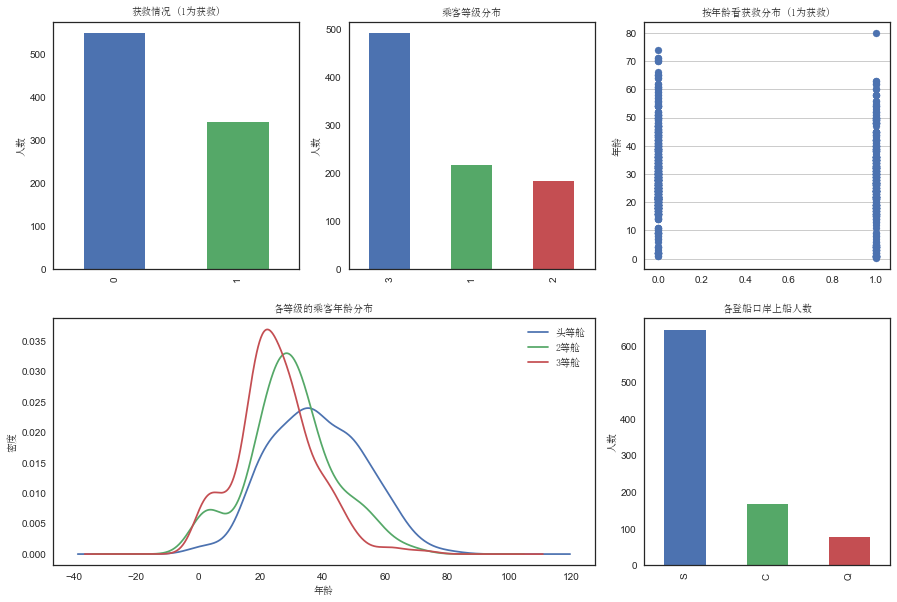

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15,10))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"获救情况 (1为获救)",fontproperties=myfont) # puts a title on our graph
plt.ylabel(u"人数",fontproperties=myfont)  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数",fontproperties=myfont)
plt.title(u"乘客等级分布",fontproperties=myfont)

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄",fontproperties=myfont)                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title(u"按年龄看获救分布 (1为获救)",fontproperties=myfont)


plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   # plots a kernel desnsity estimate of the subset of the 1st class passanges's age
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄",fontproperties=myfont)# plots an axis lable
plt.ylabel(u"密度",fontproperties=myfont) 
plt.title(u"各等级的乘客年龄分布",fontproperties=myfont)
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best',prop=myfont) # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数",fontproperties=myfont)
plt.ylabel(u"人数",fontproperties=myfont)  
plt.show()

## 1.1观察客舱等级（Pclass）与获救的关系

<Figure size 1080x432 with 0 Axes>

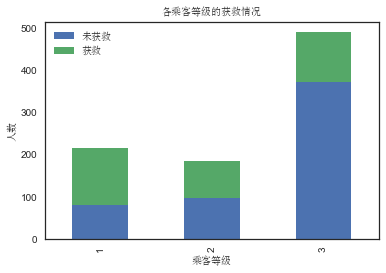

In [8]:
#看看各乘客等级的获救情况
fig = plt.figure(figsize=(15,6))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况",fontproperties=myfont)
plt.xlabel(u"乘客等级",fontproperties=myfont) 
plt.ylabel(u"人数",fontproperties=myfont) 
plt.legend((u'未获救', u'获救'),loc='best',prop=myfont)

plt.show()

## 1.2观察性别与获救的关系

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


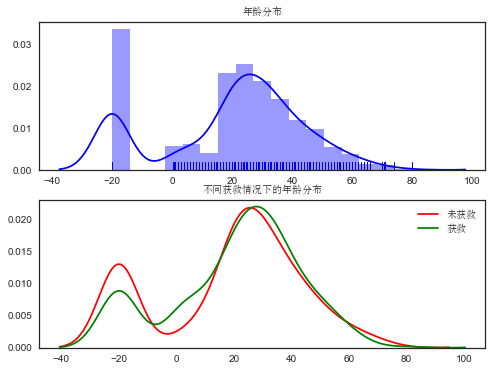

In [9]:
fig, axes = plt.subplots(2,1,figsize=(8,6))
sns.set_style('white')
sns.distplot(data_train.Age.fillna(-20), rug=True, color='b', ax=axes[0])
ax0 = axes[0]
ax0.set_title('年龄分布',fontproperties=myfont)
ax0.set_xlabel('')

ax1 = axes[1]
ax1.set_title('不同获救情况下的年龄分布',fontproperties=myfont)
k1 = sns.distplot(data_train[data_train.Survived==0].Age.fillna(-20), hist=False, color='r', ax=ax1, label='未获救')
k2 = sns.distplot(data_train[data_train.Survived==1].Age.fillna(-20), hist=False, color='g', ax=ax1, label='获救')
ax1.set_xlabel('')

ax1.legend(fontsize=16,prop=myfont)

## 1.3观察登录港口（Embarked）的获救情况

In [ ]:
data_train.columns

<Figure size 432x288 with 0 Axes>

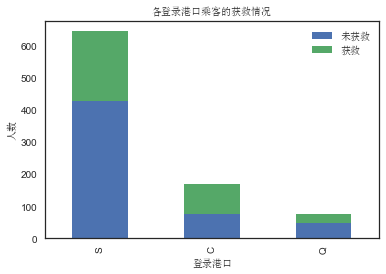

In [10]:
# ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
#看看各登录港口的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况",fontproperties=myfont)
plt.xlabel(u"登录港口",fontproperties=myfont) 
plt.ylabel(u"人数",fontproperties=myfont) 
plt.legend((u'未获救', u'获救'),loc='best',prop=myfont)
plt.show()

## 1.4观察性别与获救的关系

<Figure size 648x432 with 0 Axes>

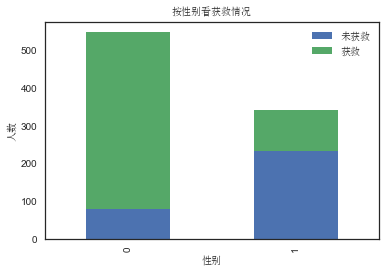

In [11]:
fig = plt.figure(figsize=(9,6))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况",fontproperties=myfont)
plt.xlabel(u"性别",fontproperties=myfont) 
plt.ylabel(u"人数",fontproperties=myfont)
plt.legend((u'未获救', u'获救'),loc='best',prop=myfont)

plt.show()

## 1.5观察舱室级别与获救的关系

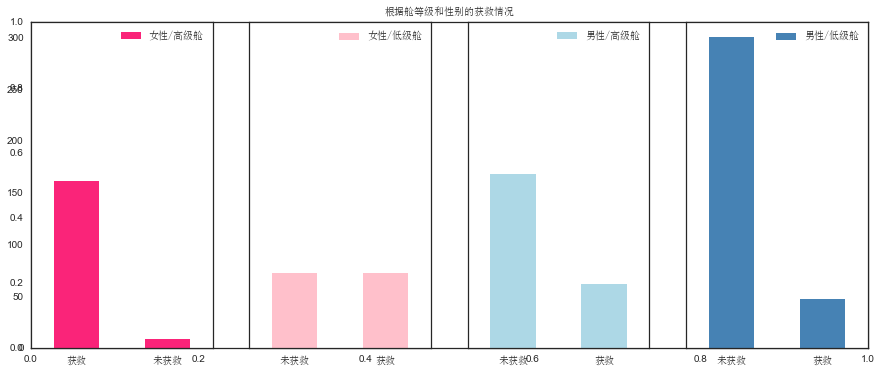

In [12]:
fig=plt.figure(figsize=(15,6))
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况",fontproperties=myfont)

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0,fontproperties=myfont)
ax1.legend([u"女性/高级舱"], loc='best',prop=myfont)

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0,fontproperties=myfont)
plt.legend([u"女性/低级舱"], loc='best',prop=myfont)

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0,fontproperties=myfont)
plt.legend([u"男性/高级舱"], loc='best',prop=myfont)

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0,fontproperties=myfont)
plt.legend([u"男性/低级舱"], loc='best',prop=myfont)

plt.show()

## 1.6 观察同乘的兄弟姐妹/配偶数与获救的关系

In [13]:
# SibSp      : 同乘的兄弟姐妹/配偶数
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

## 1.7 同乘的父母/小孩数与获救的关系

In [14]:
# Parch      : 同乘的父母/小孩数
g = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

In [ ]:
##  1.8 ticket是船票编号，应该是unique的，和最后的结果没有太大的关系，不纳入考虑的特征范畴

## 1.9 观察仓号与获救的关系

In [15]:
#cabin只有204个乘客有值，我们先看看它的一个分布
data_train.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
F33                3
E101               3
F2                 3
C22 C26            3
D                  3
E67                2
B35                2
B5                 2
C123               2
C78                2
C125               2
E121               2
C92                2
B22                2
B58 B60            2
F G73              2
D33                2
B18                2
B77                2
B20                2
C65                2
B51 B53 B55        2
C124               2
D35                2
E33                2
E44                2
B57 B59 B63 B66    2
                  ..
D6                 1
E36                1
C47                1
B101               1
D11                1
E49                1
D46                1
C46                1
C118               1
B79                1
D49                1
D47                1
B4                 1
C103               1
D37                1
A23                1
D10 D12      

# 感觉cabin的值计数太分散了，绝大多数Cabin值只出现一次。
感觉上作为类目，加入特征未必会有效，对其进行分组统计，就会发现其实是否登记仓号，也是特权

,,PassengerId
Cabin,Survived,
A10,0,1
A14,0,1
A16,1,1
A19,0,1
A20,1,1
A23,1,1
A24,0,1
A26,1,1
A31,1,1


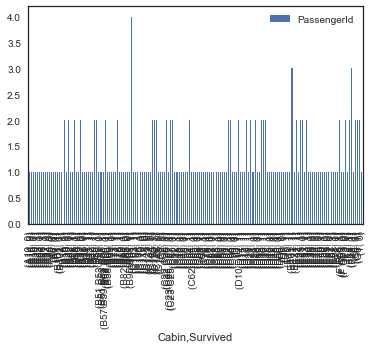

In [16]:
g = data_train.groupby(['Cabin','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df.plot(kind='bar', stacked=True)
df

<Figure size 432x288 with 0 Axes>

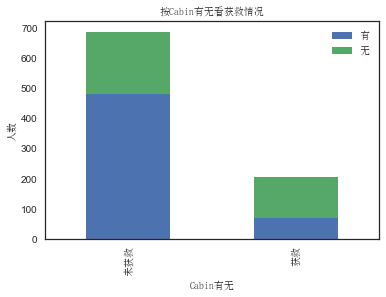

In [17]:
#那我们一起看看这个值的有无，对于survival的分布状况，影响如何吧
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况",fontproperties=myfont)
plt.xlabel(u"Cabin有无",fontproperties=myfont)
plt.xticks([0,1],[u"未获救", u"获救"],fontproperties=myfont)
plt.ylabel(u"人数",fontproperties=myfont)
plt.legend([u"有", u'无'], loc='best',prop=myfont)
plt.show()
#似乎有cabin记录的乘客survival比例稍高，那先试试把这个值分为两类，有cabin值/无cabin值，一会儿加到类别特征好了

## Age特征的补齐 ,Cabin的补齐
 我们发现Age这个属性也有177个乘客没有记录。
 通常遇到缺值的情况，我们会有几种常见的处理方式
1. 如果缺值的样本占总数比例极高，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果了
2. 如果缺值的样本适中，而该属性非连续值特征属性，那就把NaN作为一个类别，加到类别特征中
3. 如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定一个step(比如这里的age，我们可以考虑每隔2/3岁为一个步长)，然后把它离散化，之后把NaN作为一个type加到属性类目中
4. 有些情况下，缺失的值个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据，补充上

本例中，3和4应该都是可行的，我们试试4
我们这里用scikit-learn中的RandomForest来拟合一下缺失的年龄数据
注：RandomForest是一个用在原始数据中做不同采样，建立多颗DecisionTree，再进行vote取结果的机器学习算法

In [22]:
### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


 因为逻辑回归建模时，需要输入的特征都是数值型特征
 我们先对类目型的特征离散/因子化
 以Cabin为例，原本一个属性维度，因为其取值可以是['yes','no']，而将其平展开为'Cabin_yes','Cabin_no'两个属性
 原本Cabin取值为yes的，在此处的'Cabin_yes'下取值为1，在'Cabin_no'下取值为0
 原本Cabin取值为no的，在此处的'Cabin_yes'下取值为0，在'Cabin_no'下取值为1
 我们使用pandas的get_dummies来完成这个工作，并拼接在原来的data_train之上，如下所示

In [23]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


  接下来我们要接着做一些数据预处理的工作，比如scaling，将一些变化幅度较大的特征化到[-1,1]之内
  这样可以加速一些数法的收敛数据

In [24]:
# 在看一下，各列的统计信息
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.647248,0.523008,0.381594,32.204208,0.771044,0.228956,0.188552,0.086420,0.722783,0.352413,0.647587,0.242424,0.206510,0.551066
std,257.353842,0.486592,13.629879,1.102743,0.806057,49.693429,0.420397,0.420397,0.391372,0.281141,0.447876,0.477990,0.477990,0.428790,0.405028,0.497665
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,21.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1, 1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1, 1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1, 1), fare_scale_param)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


In [26]:
# 我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
    
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

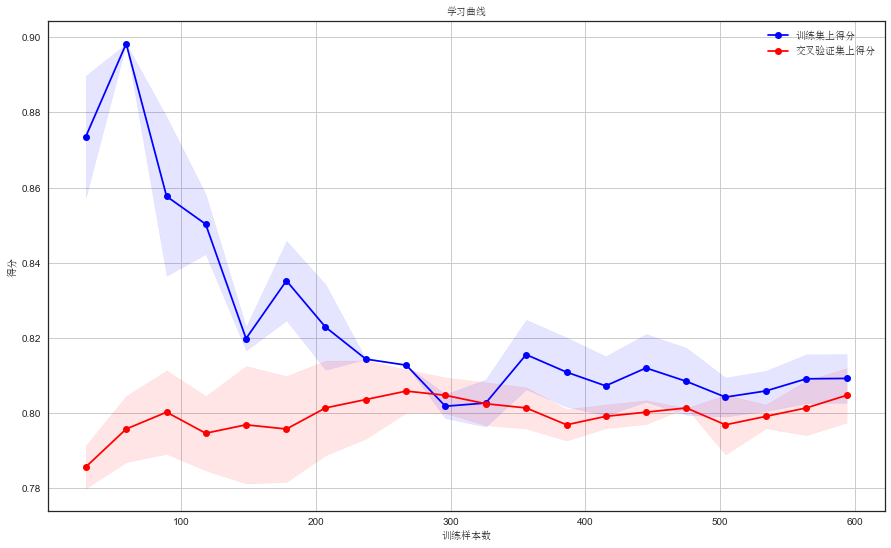

(0.80656968448540245, 0.018258876711338634)

In [27]:
# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure(figsize=(15,9))
        plt.title(title,fontproperties=myfont)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数",fontproperties=myfont)
        plt.ylabel(u"得分",fontproperties=myfont)
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best",prop=myfont)
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"学习曲线", X, y)

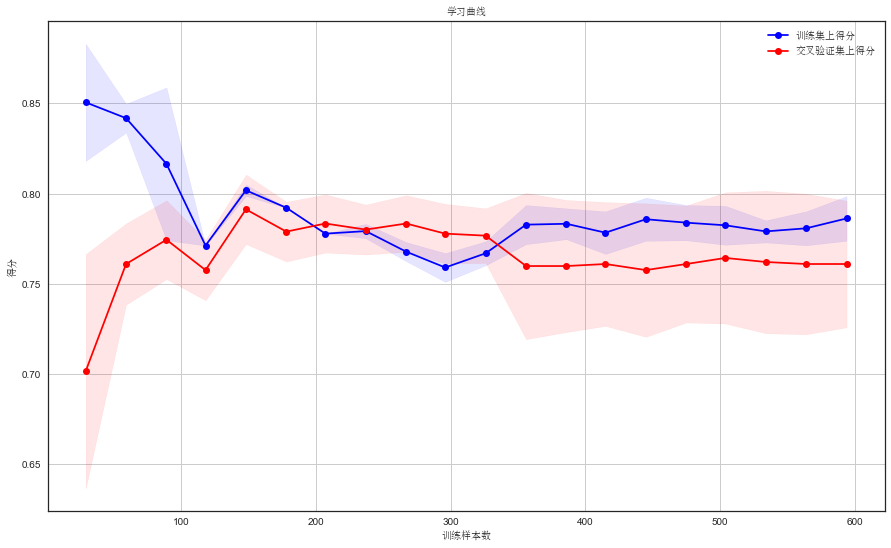

(0.76220522575774441, 0.072722441509257107)

In [28]:
import sklearn.naive_bayes as nb 
clf = nb.GaussianNB()
clf.fit(X,y)
plot_learning_curve(clf, u"学习曲线", X, y)

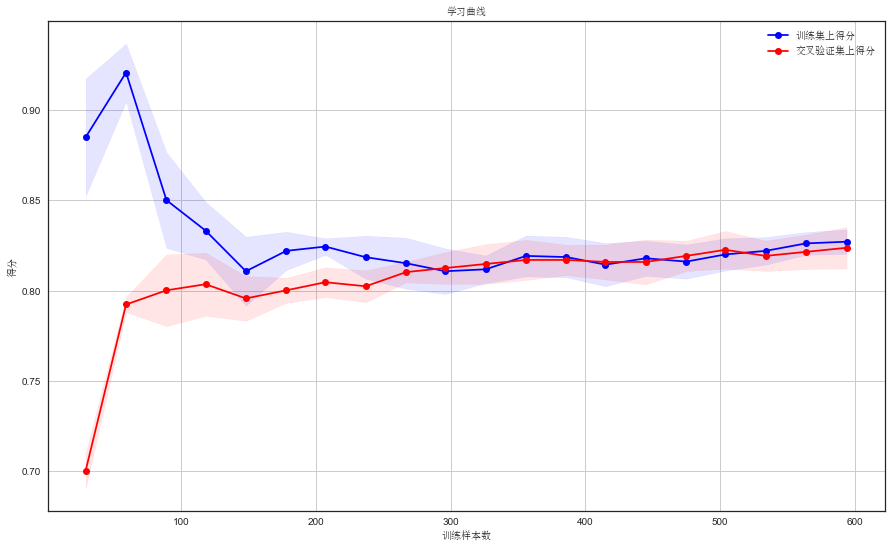

(0.82314449155982705, 0.021593223360250269)

In [29]:
from sklearn.svm import SVC 
clf = SVC()
clf.fit(X,y)
plot_learning_curve(clf, u"学习曲线", X, y)

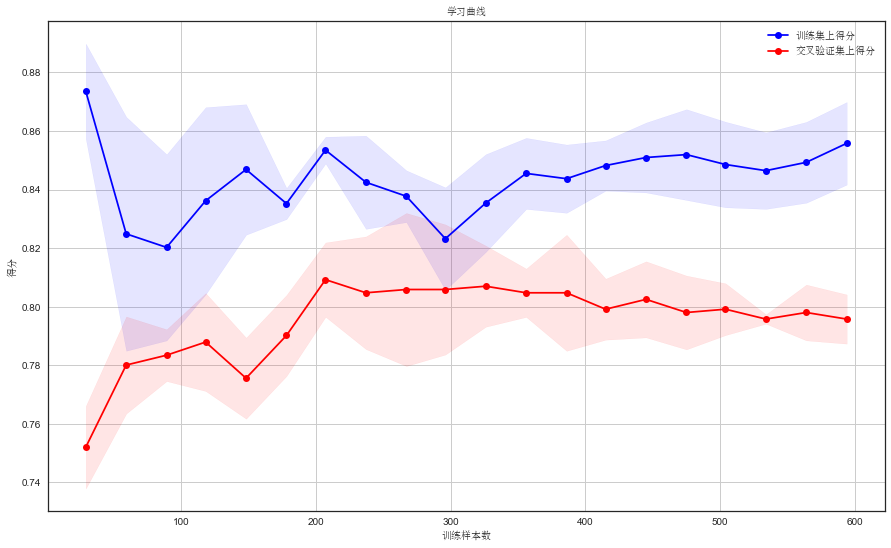

(0.82861194742784994, 0.082551200744696462)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X,y)
plot_learning_curve(clf, u"学习曲线", X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

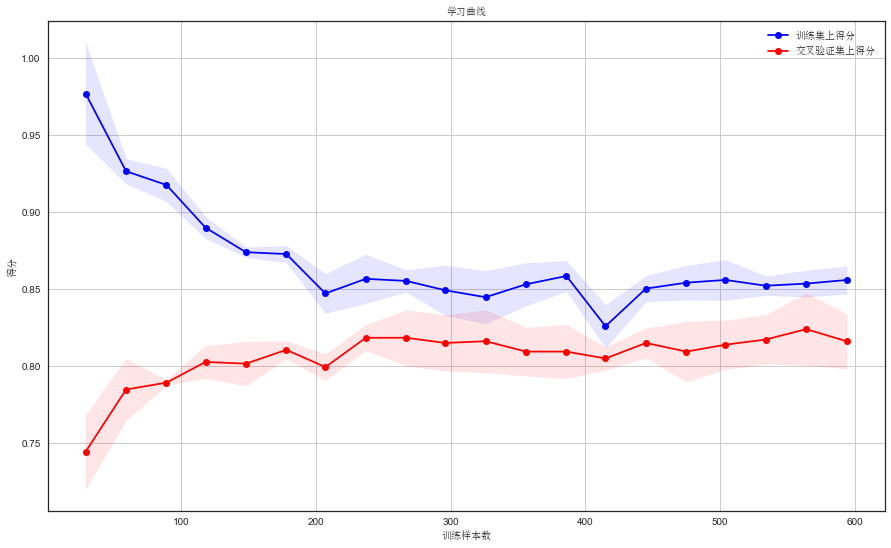

(0.83149308247880516, 0.066460947781457169)

In [31]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X,y)
plot_learning_curve(clf, u"学习曲线", X, y)

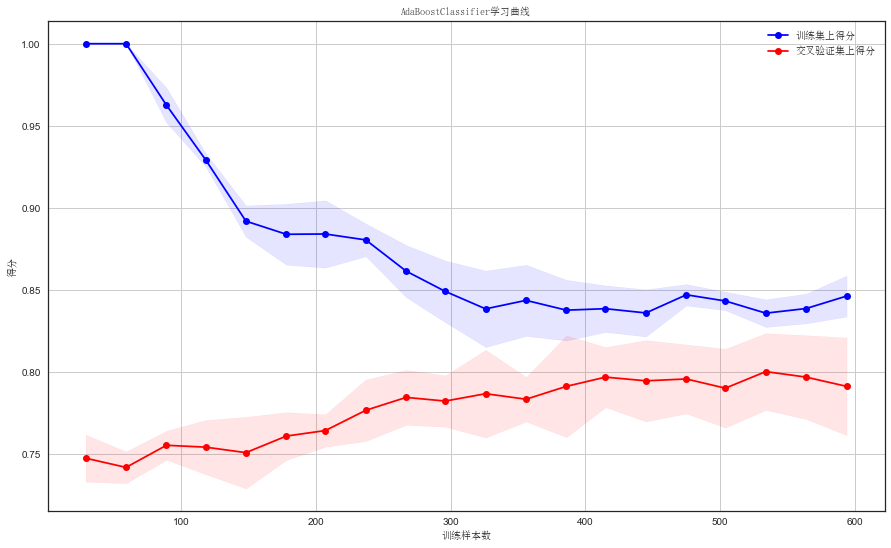

(0.81011098360632028, 0.097203521868047038)

In [32]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X,y)
plot_learning_curve(clf, u"AdaBoostClassifier学习曲线", X, y)

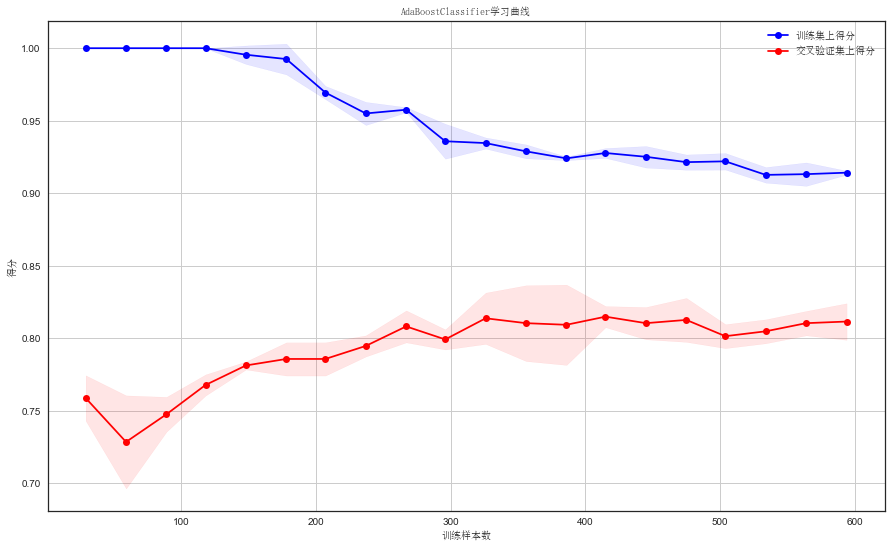

(0.85718281296917498, 0.11666634908160878)

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X,y)
plot_learning_curve(clf, u"AdaBoostClassifier学习曲线", X, y)

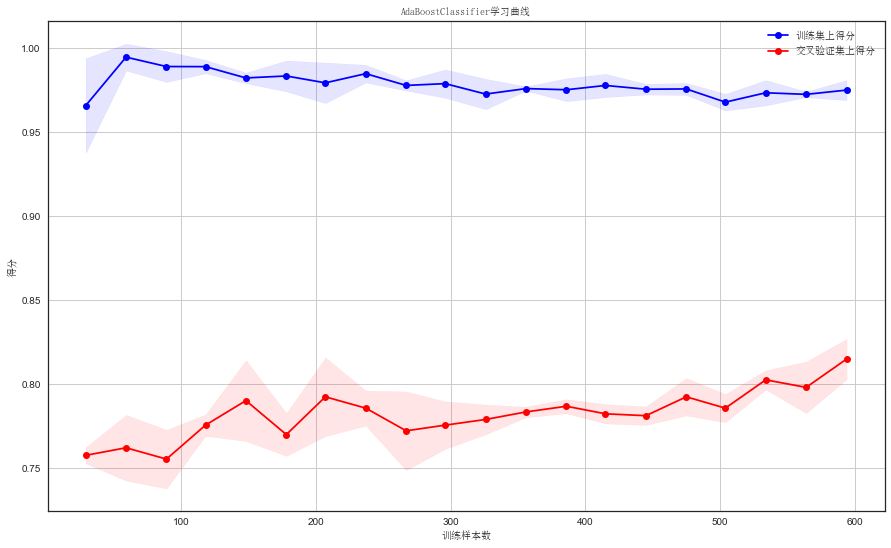

(0.89178533157911577, 0.17790753914483382)

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X,y)
plot_learning_curve(clf, u"AdaBoostClassifier学习曲线", X, y)

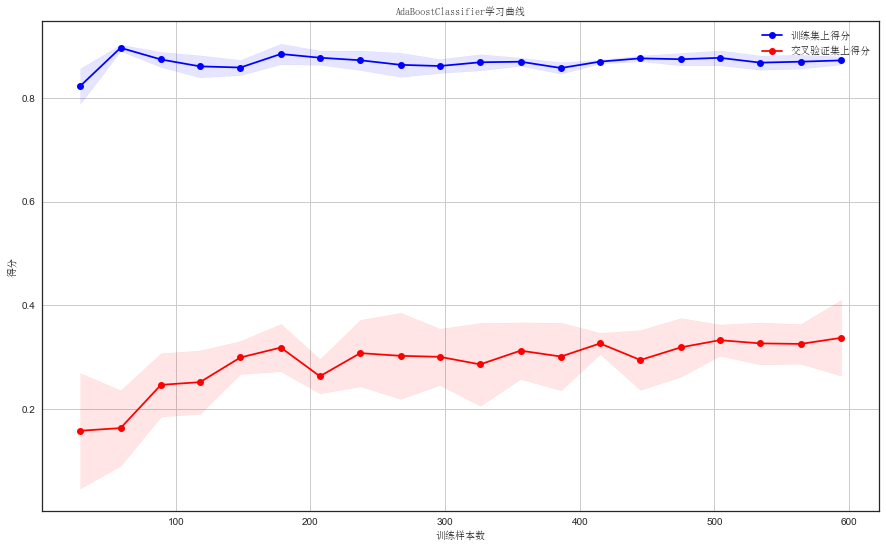

(0.57196773487129882, 0.6167332668030433)

In [35]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X,y)
plot_learning_curve(clf, u"AdaBoostClassifier学习曲线", X, y)